In [48]:
from timeit import default_timer as timer
start = timer()

In [49]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from icecream import ic
import os
import skimage
from skimage import transform
from skimage.color import rgb2gray
import numpy as np 
from matplotlib import pyplot as plt
import random

In [50]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
                   if os.path.isdir(os.path.join(data_directory,d))]
    #ic(directories)
    labels=[]
    images=[]
    for d in directories:
        label_directory = os.path.join(data_directory,d)
        file_names = [os.path.join(label_directory,f)
                      for f in os.listdir(label_directory)
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/home/nilray/projects/tensorflow-tutorial/data"
train_data_directory = os.path.join(ROOT_PATH,"training/Training")
test_data_directory = os.path.join(ROOT_PATH,"testing/Testing")

images, labels = load_data(train_data_directory)

Shape of first 10 images:  [(141, 142, 3), (120, 123, 3), (105, 107, 3), (94, 105, 3), (128, 139, 3), (110, 118, 3), (85, 95, 3), (180, 193, 3), (121, 133, 3), (81, 88, 3)]
First image array:  [[[210 249 232]
  [204 249 208]
  [197 198 155]
  ...
  [ 51  60  40]
  [ 54  64  44]
  [ 57  66  46]]

 [[209 250 236]
  [212 255 217]
  [200 196 156]
  ...
  [ 49  57  38]
  [ 51  59  41]
  [ 53  60  42]]

 [[203 246 236]
  [207 246 213]
  [202 192 156]
  ...
  [ 47  53  35]
  [ 48  54  36]
  [ 48  55  37]]

 ...

 [[  2  22  25]
  [ 26  56  77]
  [ 71 140 159]
  ...
  [ 84  77  50]
  [ 68  66  41]
  [ 56  64  44]]

 [[  0  22  32]
  [ 30  75 106]
  [ 87 176 198]
  ...
  [ 86  80  52]
  [ 68  66  41]
  [ 55  63  42]]

 [[  0  32  50]
  [ 42 101 135]
  [121 217 239]
  ...
  [ 87  80  52]
  [ 70  68  43]
  [ 58  66  46]]]
First 10 labels:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Shape of labels:  (4575,)
Unique labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 

(array([ 15., 110.,  13.,  15.,  15.,  11.,  18., 157.,  27.,  18.,  21.,
          7.,  18.,  90.,  43.,   9.,   9.,  79.,  81., 231.,  42.,  43.,
        375.,  15.,  48.,  42.,   6.,  18., 125.,  33.,  37.,  63., 316.,
         12.,  46.,  60.,  18.,  98., 285., 196., 242., 148.,  35.,  30.,
         48.,  74.,  44., 147.,  11.,  12.,  15.,  27.,  27., 199., 118.,
         12.,  95.,  78.,  15.,  42., 291.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61.]),
 <BarContainer object of 61 artists>)

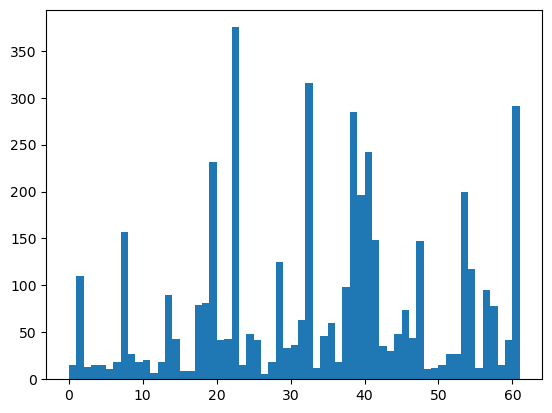

In [51]:
print("Shape of first 10 images: ",[np.array(images[i]).shape for i in range(10)])
print("First image array: ",np.array(images[0]))

print("First 10 labels: ",[(labels[i]) for i in range(10)])
print("Shape of labels: ",np.array(labels).shape)
print("Unique labels: ",np.unique(labels))
plt.hist(labels, bins=61)

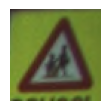

shape: (62, 61, 3), min: 3, max: 160


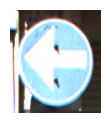

shape: (110, 96, 3), min: 3, max: 255


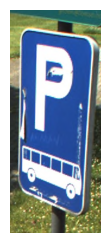

shape: (379, 153, 3), min: 0, max: 255


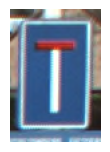

shape: (100, 68, 3), min: 17, max: 255


In [52]:
#Images corresponding to following indices will be displayed
traffic_signs = [300,2250,3650,4000]

for i in range(len(traffic_signs)):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape,
                                                  images[traffic_signs[i]].min(),
                                                  images[traffic_signs[i]].max()))
    


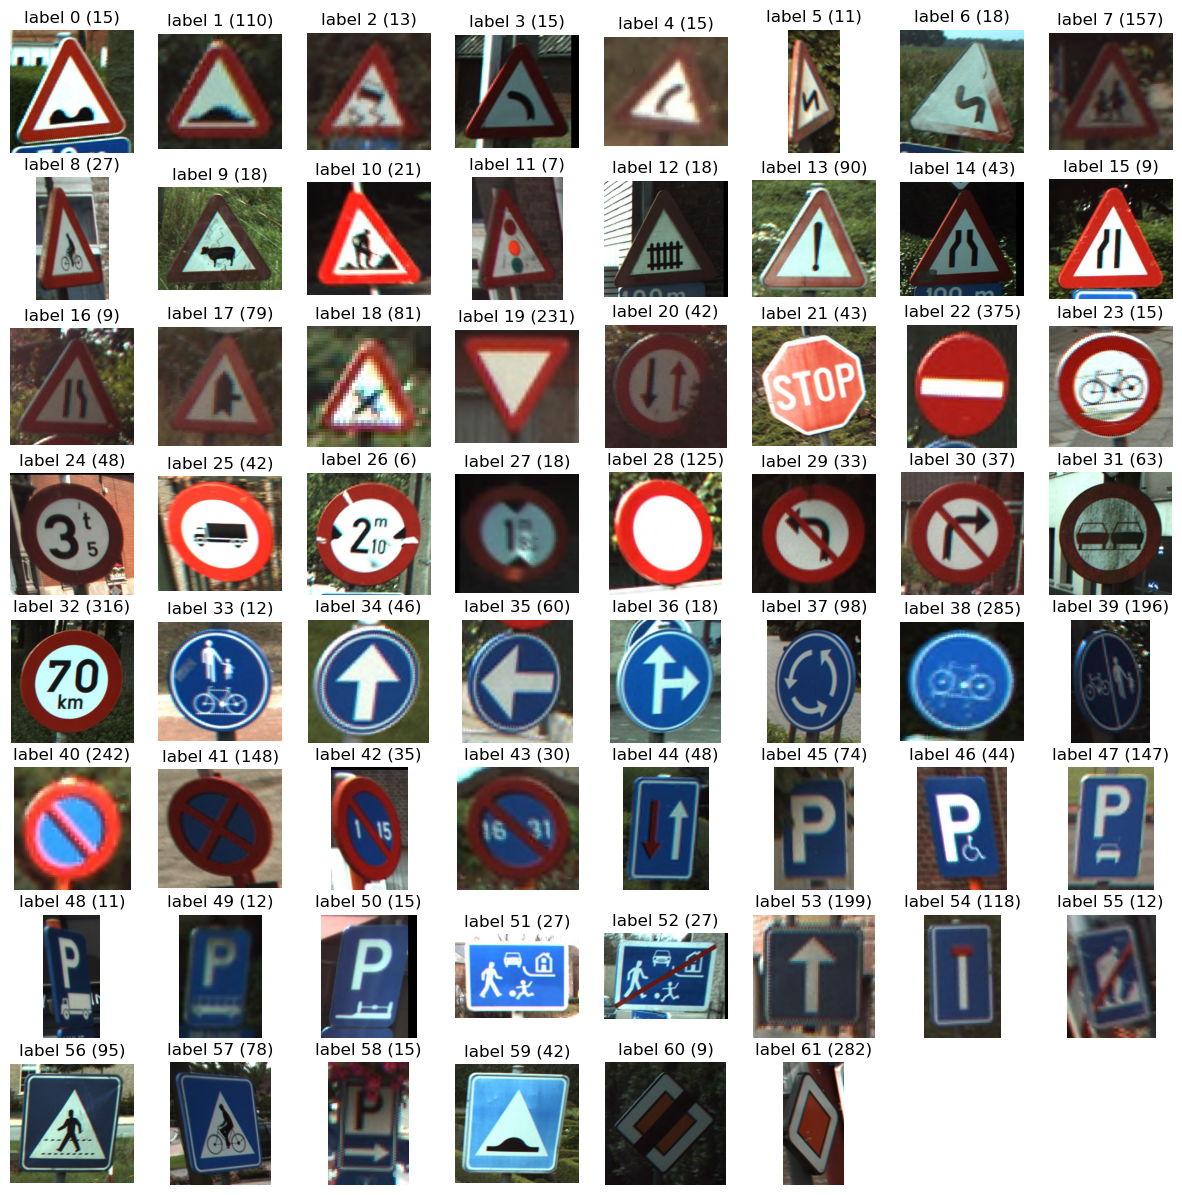

In [53]:
#Displaying sample images for each unique label
unique_labels = set(labels)

#Initiate figure
plt.figure(figsize=(15,15))

#Set counter
i=1

#for each unique label
for label in unique_labels:
    #pick first image for the selected label
    image = images[labels.index(label)]
    #define grid of 8x8 = 64 subplots
    plt.subplot(8,8,i)
    #suppress axes
    plt.axis("off")
    #add title to each subplot
    plt.title("label {0} ({1})".format(label,labels.count(label)))
    #increment the counter
    i += 1
    #plot the sample image
    plt.imshow(image)
    
#show the plot
plt.show()

In [54]:
#rescale images
images28 = [transform.resize(image, (28,28)) for image in images]

In [55]:
#convert images28 to an array
images28 = np.array(images28)
#convert to grayscale
images28 = rgb2gray(images28)

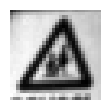

shape: (28, 28), min: 0.14911365186235515, max: 0.5540541652413684


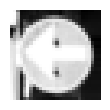

shape: (28, 28), min: 0.11009255021810246, max: 0.9999397529867904


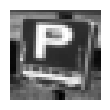

shape: (28, 28), min: 0.14081271762979441, max: 0.9979456299086922


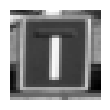

shape: (28, 28), min: 0.10600718014211603, max: 0.9941590546860086


In [56]:
#check conversion correctness
#Images corresponding to following indices will be displayed
traffic_signs = [300,2250,3650,4000]

for i in range(len(traffic_signs)):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]],cmap='gray')
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape,
                                                  images28[traffic_signs[i]].min(),
                                                  images28[traffic_signs[i]].max()))
    

In [57]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28,28)),
        #tf.keras.layers.Rescaling(1.0/255),
        #tf.keras.layers.RandomFlip("horizontal"),
        #tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=62,activation='relu'),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Dense(units=62,activation='softmax')
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 62)                48670     
                                                                 
 dropout_1 (Dropout)         (None, 62)                0         
                                                                 
 dense_3 (Dense)             (None, 62)                3906      
                                                                 
Total params: 52,576
Trainable params: 52,576
Non-trainable params: 0
_________________________________________________________________


In [58]:
batch_size = 128
epochs = 100

labels_float = np.array(labels).astype('float32')
y_train = tf.keras.utils.to_categorical(labels_float,num_classes=62)

#ic(labels_float[0])
#ic(y_train[0])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x=images28,y=y_train,batch_size=batch_size,epochs=epochs,validation_split=0.02)

Epoch 1/100
36/36 [==============================] - 1s 10ms/step - loss: 3.5178 - accuracy: 0.1869 - val_loss: 3.1634 - val_accuracy: 0.0870
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 2.8637 - accuracy: 0.3455 - val_loss: 2.4252 - val_accuracy: 0.6304
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 2.4957 - accuracy: 0.4274 - val_loss: 1.7846 - val_accuracy: 0.8587
Epoch 4/100
36/36 [==============================] - 0s 6ms/step - loss: 2.2029 - accuracy: 0.5139 - val_loss: 1.5410 - val_accuracy: 0.8587
Epoch 5/100
36/36 [==============================] - 0s 7ms/step - loss: 1.9820 - accuracy: 0.5501 - val_loss: 1.1945 - val_accuracy: 0.9022
Epoch 6/100
36/36 [==============================] - 0s 7ms/step - loss: 1.7948 - accuracy: 0.5929 - val_loss: 1.1672 - val_accuracy: 0.8913
Epoch 7/100
36/36 [==============================] - 0s 8ms/step - loss: 1.6252 - accuracy: 0.6400 - val_loss: 0.9910 - val_accuracy: 0.9130
Epoch 8/100


In [59]:
#load testing data
test_images, test_labels = load_data(train_data_directory)

#rescale images
test_images28 = [transform.resize(image, (28,28)) for image in test_images]
#convert images28 to an array
test_images28 = np.array(test_images28)
#convert to grayscale
test_images28 = rgb2gray(test_images28)

test_labels_float = np.array(test_labels).astype('float32')
y_test = tf.keras.utils.to_categorical(test_labels_float,num_classes=62)

In [60]:
score = model.evaluate(x=test_images28,y=y_test,verbose=0)
print("Test loss = ",score[0])
print("Test accuracy = ",score[1])

Test loss =  0.11922599375247955
Test accuracy =  0.9761748909950256


1/1 [==============================] - 0s 27ms/step
predicted label shape (10, 62)
All predicted labels =  [38 37 22 40 38 32 14 22 36 18]
All actual labels =  [38, 37, 22, 41, 38, 32, 14, 22, 36, 18]


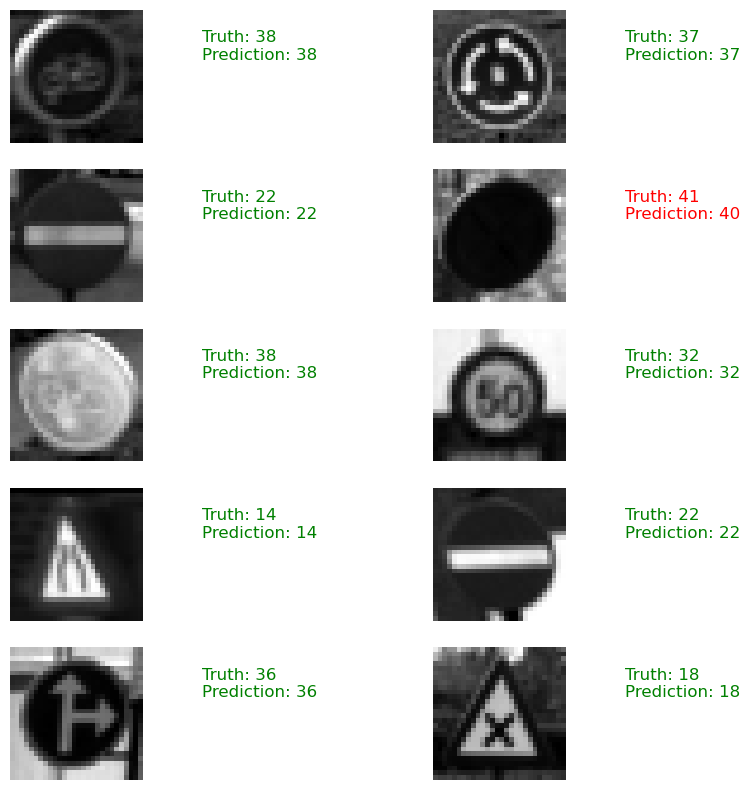

In [63]:
#Visualizing model results
#picl 10 random test images
sample_indexes = random.sample(range(len(test_images28)),10)
sample_images = [test_images28[i] for i in sample_indexes]
sample_labels = [test_labels[i] for i in sample_indexes]

#predict labels for the sample images
predicted_labels = model.predict(np.array(sample_images))
print("predicted label shape",predicted_labels.shape)

print("All predicted labels = ",np.argmax(predicted_labels,axis=1))
print("All actual labels = ",sample_labels)

# Display the predicted vs actual labels
fig = plt.figure(figsize=(10,10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = np.argmax(predicted_labels[i],axis=0)
    plt.subplot(5,2,1+i)
    plt.axis('off')
    color = 'green' if truth == prediction else 'red'
    plt.text(40,10,"Truth: {0}\nPrediction: {1}".format(truth,prediction),
             fontsize=12, color=color)
    plt.imshow(sample_images[i], cmap='gray')
    
plt.show()

In [62]:
end = timer()
print("--- %s seconds ---" % (end-start))

--- 293.61502850299985 seconds ---
